/Volumes/GoogleDrive-107447422292285979672/My Drive/learning_note/GEMM/scripts
max(MB*KB, 8+12*i+MB)+MB 12148

y_master 0.057956615333664516
y_summa 0.37177541729893776
y_summa2 0.5420353982300885
y_summa_opt 1.0


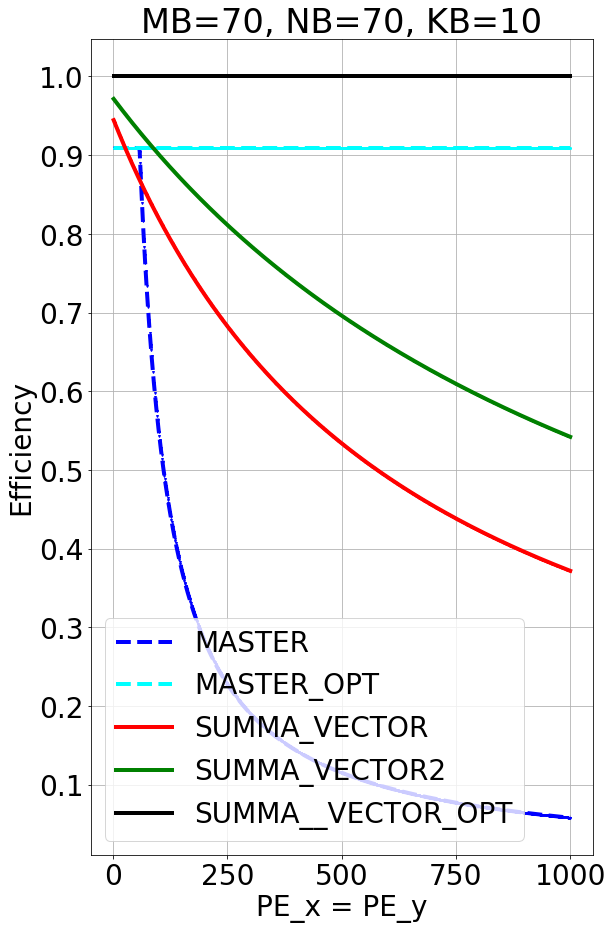

In [3]:
import numpy as np
import sys 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os
from array import *
import math
import matplotlib.dates as mdate
import matplotlib.ticker as mtick
import itertools
from matplotlib import pyplot
from matplotlib.pyplot import MultipleLocator

print(Path.cwd())
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)

############################################################
# 1 node of different tile size
# 
############################################################

# Plot
size = 28
line_width = 4
marker_size = 28
# size of x-axis and y-axis
mpl.rcParams['xtick.labelsize'] = size
mpl.rcParams['ytick.labelsize'] = size

MB = 70
NB = 70
KB = 10
PE_x = 1000

x = [i for i in range(1, PE_x+1)]
y_master = [0.0 for _ in range(PE_x)]
y_master_opt = [0.0 for _ in range(PE_x)]
y_summa = [0.0 for _ in range(PE_x)]
y_summa2 = [0.0 for _ in range(PE_x)]
y_summa_opt = [0.0 for _ in range(PE_x)]


for i in x:
    y_master[i-1] = MB * KB / (max(MB*KB, 8+12*i)+MB)
    y_master_opt[i-1] = (MB * KB * NB * i)/((MB*KB+MB)*NB*i+12*i)
    y_summa[i-1] = MB * NB / (MB * NB + 8 * i+ 4 * MB)
    y_summa2[i-1] = MB * NB / (MB * NB + max(4 * i+ 2 * MB, 4 * i+ 2 * NB))
    y_summa_opt[i-1] = MB * NB / max(MB * NB, 4 * i+ 2 * MB, 4 * i+ 2 * NB)
        
#print('x', x)
print('max(MB*KB, 8+12*i+MB)+MB', max(MB*KB, 8+12*i+MB)+MB)
print()
print('y_master', y_master[-1])
print('y_summa', y_summa[-1])
print('y_summa2', y_summa2[-1])
print('y_summa_opt', y_summa_opt[-1])

fig, ax = plt.subplots(figsize=(9,15))
ax.set_xlabel('PE_x = PE_y', fontsize=size)
ax.set_ylabel('Efficiency', fontsize=size)


line1 = ax.plot(x, y_master, "--", marker='v', markersize=2,
                linewidth=line_width, color='b', label='MASTER')

line11 = ax.plot(x, y_master_opt, "--", marker='P', markersize=2,
                linewidth=line_width, color='cyan', label='MASTER_OPT')

line2 = ax.plot(x, y_summa, "-", marker='*', markersize=2,
                linewidth=line_width, color='r', label='SUMMA_VECTOR')

line3 = ax.plot(x, y_summa2, "-", marker='.', markersize=2,
                linewidth=line_width, color='g', label='SUMMA_VECTOR2')

line4 = ax.plot(x, y_summa_opt, "-", marker='+', markersize=2,
                linewidth=line_width, color='black', label='SUMMA__VECTOR_OPT')

ax.grid(True)
#ax.set_yscale('log')


#plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : size}
plt.rc('font', **font)


y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
#ax.set_ylim(0.4, 1)
#ax.set_xlim(0, 1000)


#ax.set_xscale('log')

plt.tick_params(labelsize=size)
#ax.legend(loc='lower left', ncol = 1)
ax.legend(loc='lower left', ncol = 1)
ax.set_title(f'MB={MB}, NB={NB}, KB={KB}')

plt.savefig(f"../figures/efficiency_cost_{MB}_{NB}_{KB}.pdf", dpi=300, bbox_inches='tight')

plt.show()



/Volumes/GoogleDrive-107447422292285979672/My Drive/learning_note/GEMM/scripts
max(MB*KB, 8+12*i+MB)+MB 12148

y_master 0.057956615333664516
y_summa 0.8193979933110368
y_summa2 0.9007352941176471
y_summa_opt 1.0


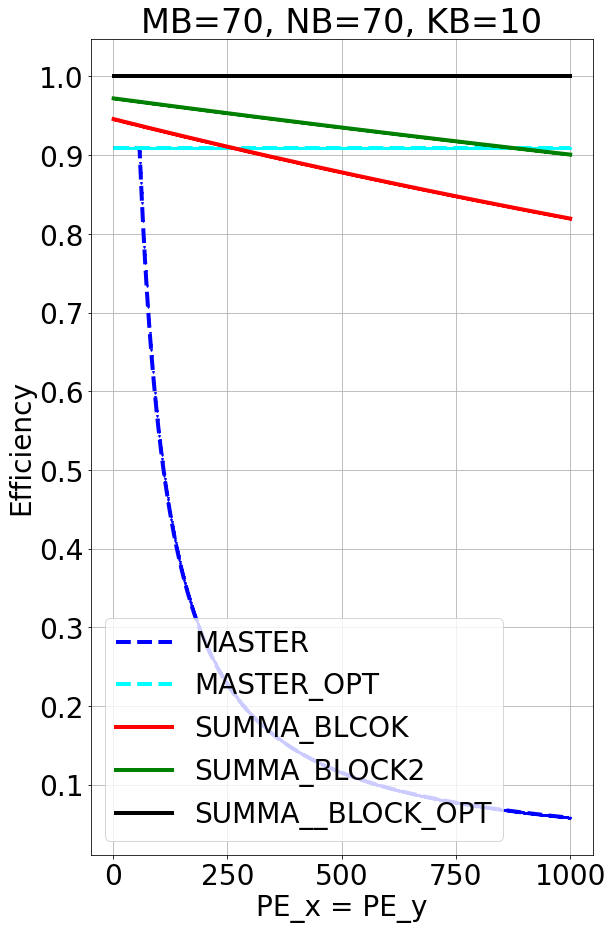

In [7]:
import numpy as np
import sys 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os
from array import *
import math
import matplotlib.dates as mdate
import matplotlib.ticker as mtick
import itertools
from matplotlib import pyplot
from matplotlib.pyplot import MultipleLocator

print(Path.cwd())
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)

############################################################
# 1 node of different tile size
# 
############################################################

# Plot
size = 28
line_width = 4
marker_size = 28
# size of x-axis and y-axis
mpl.rcParams['xtick.labelsize'] = size
mpl.rcParams['ytick.labelsize'] = size

MB = 70
NB = 70
KB = 10
PE_x = 1000

x = [i for i in range(1, PE_x+1)]
y_master = [0.0 for _ in range(PE_x)]
y_master_opt = [0.0 for _ in range(PE_x)]
y_summa = [0.0 for _ in range(PE_x)]
y_summa2 = [0.0 for _ in range(PE_x)]
y_summa_opt = [0.0 for _ in range(PE_x)]


for i in x:
    y_master[i-1] = MB * KB / (max(MB*KB, 8+12*i)+MB)
    y_master_opt[i-1] = (MB * KB * NB * i)/((MB*KB+MB)*NB*i+12*i)
    y_summa[i-1] = MB * NB * KB / (MB * NB * KB  + 8 * i+ 4 * MB * KB)
    y_summa2[i-1] = MB * NB * KB / (MB * NB * KB + max(4 * i+ 2 * MB * KB, 4 * i+ 2 * NB * KB))
    y_summa_opt[i-1] = MB * NB * KB / max(MB * NB * KB, 4 * i+ 2 * MB * KB, 4 * i+ 2 * NB * KB)
        
#print('x', x)
print('max(MB*KB, 8+12*i+MB)+MB', max(MB*KB, 8+12*i+MB)+MB)
print()
print('y_master', y_master[-1])
print('y_summa', y_summa[-1])
print('y_summa2', y_summa2[-1])
print('y_summa_opt', y_summa_opt[-1])

fig, ax = plt.subplots(figsize=(9,15))
ax.set_xlabel('PE_x = PE_y', fontsize=size)
ax.set_ylabel('Efficiency', fontsize=size)


line1 = ax.plot(x, y_master, "--", marker='v', markersize=2,
                linewidth=line_width, color='b', label='MASTER')

line11 = ax.plot(x, y_master_opt, "--", marker='P', markersize=2,
                linewidth=line_width, color='cyan', label='MASTER_OPT')

line2 = ax.plot(x, y_summa, "-", marker='*', markersize=2,
                linewidth=line_width, color='r', label='SUMMA_BLCOK')

line3 = ax.plot(x, y_summa2, "-", marker='.', markersize=2,
                linewidth=line_width, color='g', label='SUMMA_BLOCK2')

line4 = ax.plot(x, y_summa_opt, "-", marker='+', markersize=2,
                linewidth=line_width, color='black', label='SUMMA__BLOCK_OPT')

ax.grid(True)
#ax.set_yscale('log')


#plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : size}
plt.rc('font', **font)


y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
#ax.set_ylim(0.4, 1)
#ax.set_xlim(0, 1000)


#ax.set_xscale('log')

plt.tick_params(labelsize=size)
#ax.legend(loc='lower left', ncol = 1)
ax.legend(loc='lower left', ncol = 1)
ax.set_title(f'MB={MB}, NB={NB}, KB={KB}')

plt.savefig(f"../figures/efficiency_cost_block_{MB}_{NB}_{KB}.pdf", dpi=300, bbox_inches='tight')

plt.show()




/Volumes/GoogleDrive-107447422292285979672/My Drive/learning_note/GEMM/scripts
max(MB*KB, 8+12*i+MB)+MB 12048

y_master 0.03325573661456601
y_summa 0.0
y_summa2 0.0
y_summa_opt 1.0


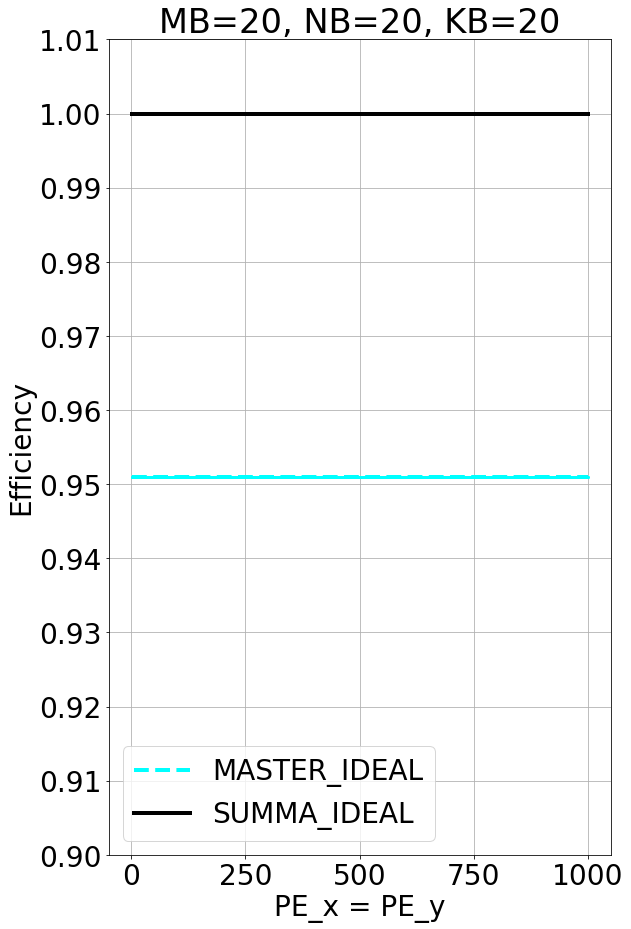

In [18]:
import numpy as np
import sys 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os
from array import *
import math
import matplotlib.dates as mdate
import matplotlib.ticker as mtick
import itertools
from matplotlib import pyplot
from matplotlib.pyplot import MultipleLocator

print(Path.cwd())
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)

############################################################
# 1 node of different tile size
# 
############################################################

# Plot
size = 28
line_width = 4
marker_size = 28
# size of x-axis and y-axis
mpl.rcParams['xtick.labelsize'] = size
mpl.rcParams['ytick.labelsize'] = size

MB = 20
NB = 20
KB = 20
PE_x = 1000
K = KB * PE_x

x = [i for i in range(1, PE_x+1)]
y_master = [0.0 for _ in range(PE_x)]
y_master_opt = [0.0 for _ in range(PE_x)]
y_summa = [0.0 for _ in range(PE_x)]
y_summa2 = [0.0 for _ in range(PE_x)]
y_summa_opt = [0.0 for _ in range(PE_x)]


for i in x:
    y_master[i-1] = MB * KB / (max(MB*KB, 8+12*i)+MB)
    y_master_opt[i-1] = (MB * KB * NB * i)/((MB*KB+MB)*NB*i+12*i)
    #y_summa[i-1] = MB * NB * KB / (MB * NB * KB  + 8 * i+ 4 * MB * KB)
    #y_summa2[i-1] = MB * NB * KB / (MB * NB * KB + max(4 * i+ 2 * MB * KB, 4 * i+ 2 * NB * KB))
    y_summa_opt[i-1] = MB * NB * K / max(MB * NB * K, 4 * i+ 2 * MB * K, 4 * i+ 2 * NB * K)
        
#print('x', x)
print('max(MB*KB, 8+12*i+MB)+MB', max(MB*KB, 8+12*i+MB)+MB)
print()
print('y_master', y_master[-1])
print('y_summa', y_summa[-1])
print('y_summa2', y_summa2[-1])
print('y_summa_opt', y_summa_opt[-1])

fig, ax = plt.subplots(figsize=(9,15))
ax.set_xlabel('PE_x = PE_y', fontsize=size)
ax.set_ylabel('Efficiency', fontsize=size)


#line1 = ax.plot(x, y_master, "--", marker='v', markersize=2,
#                linewidth=line_width, color='b', label='MASTER')

line11 = ax.plot(x, y_master_opt, "--", marker='P', markersize=2,
                linewidth=line_width, color='cyan', label='MASTER_IDEAL')

#line2 = ax.plot(x, y_summa, "-", marker='*', markersize=2,
#                linewidth=line_width, color='r', label='SUMMA_BLCOK')

#line3 = ax.plot(x, y_summa2, "-", marker='.', markersize=2,
#                linewidth=line_width, color='g', label='SUMMA_BLOCK2')

line4 = ax.plot(x, y_summa_opt, "-", marker='+', markersize=2,
                linewidth=line_width, color='black', label='SUMMA_IDEAL')

ax.grid(True)
#ax.set_yscale('log')


#plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : size}
plt.rc('font', **font)


y_major_locator=MultipleLocator(0.01)
ax.yaxis.set_major_locator(y_major_locator)
ax.set_ylim(0.9, 1.01)
#ax.set_xlim(0, 1000)


#ax.set_xscale('log')

plt.tick_params(labelsize=size)
#ax.legend(loc='lower left', ncol = 1)
ax.legend(loc='best', ncol = 1)
ax.set_title(f'MB={MB}, NB={NB}, KB={KB}')

plt.savefig(f"../figures/efficiency_cost_ideal_{MB}_{NB}_{KB}.pdf", dpi=300, bbox_inches='tight')

plt.show()





In [71]:
import numpy as np
import sys 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os
from array import *
import math
import matplotlib.dates as mdate
import matplotlib.ticker as mtick
import itertools
from matplotlib import pyplot
from matplotlib.pyplot import MultipleLocator

print(Path.cwd())
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)

############################################################
# 1 node of different tile size
# 
############################################################

# Plot
size = 28
line_width = 4
marker_size = 28
# size of x-axis and y-axis
mpl.rcParams['xtick.labelsize'] = size
mpl.rcParams['ytick.labelsize'] = size

x = 16
K = [128, 256]
N = [128, 256]
M = [128, 256, 384]

x = 10
K = [20]
N = [720]
M = [720]

for MB in (i/x for i in M):
    for NB in (j/x for j in N):
        for KB in (k/x for k in K):
            y_master = MB * KB / (max(MB*KB+MB, 8+12*x+MB))
            y_summa = MB * NB / (MB * NB + 8 * x+ 4 * MB)
            y_summa2 = MB * NB / (MB * NB + max(4 * x+ 2 * MB, 4 * x+ 2 * NB))
            y_summa_opt = MB * NB / max(MB * NB, 4 * x+ 2 * MB, 4 * x+ 2 * NB)
            y_master_opt = (MB * KB * NB * x)/((MB*KB+MB)*NB*x+12*x)
        
            print('K', KB * x)
            print('N', NB * x)
            print('M', MB * x)
            print('x', x)
            print('y_master_opt', int(MB * NB * KB * x / 4 / y_master_opt))
            print('y_master', y_master,  int(MB * NB * KB * x / 4 / y_master))
            print('y_summa', y_summa,  int(MB * NB * KB * x / 4 / y_summa))
            print('y_summa2', y_summa2, int(MB * NB * KB * x / 4 / y_summa2))
            print('y_summa_opt', y_summa_opt,  int(MB * NB * KB * x / 4 / y_summa_opt))
            print('%d & %d & %d & %d'%(int(MB * NB * KB * x / 4 / y_master), 
                                       int(MB * NB * KB * x / 4 / y_master_opt), 
                                       int(MB * NB * KB * x / 4 / y_summa), 
                                       int(MB * NB * KB * x / 4 / y_summa2)))
            print('')
            print('')
            






/Users/cql/Desktop/learning_note/GEMM/scripts
K 20.0
N 720.0
M 720.0
x 10
y_master_opt 38910
y_master 0.6666666666666666 38880
y_summa 0.9337175792507204 27760
y_summa2 0.9657228017883756 26840
y_summa_opt 1.0 25920
38880 & 38910 & 27760 & 26840


